<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/05_introduccion_netcdf4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<html><img src="https://owncloud.aemet.es/index.php/s/lwiFbCGBRAJHlF7/download?path=%2F&files=logo.png"></html>


* **Autor:** Ernesto Barrera
* **Institución:** AEMET
---

#Introducción a NetCDF4

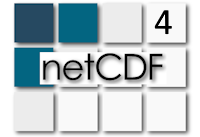

* [Web del proyecto](https://unidata.github.io/netcdf4-python/)
* [Referencia de la API](https://unidata.github.io/netcdf4-python/#header-functions)

* **¿Qué es netCDF4?** En este contexto es una intefaz Python para la librería C de NetCDFextensión de Python que permite trabajar con fichero en formato NetCDF.

* **¿Cómo se usa netCDF4?** Asignando un fichero netCDF a un objeto Python y operando con sus respectivos métodos.

* **¿Cuándo usar netCDF4?** Cuando sea preciso leer/escribir datos en formato netCDf y acceder a opciones avanzadas del formato.

* **¿Por qué netCDF4?** Porque es una interfaz directa a la librería de quienes mantienen el formato.




##Instalación

* La extensión NetCDF4 puede instalarse a través de múltiples repositorios de paquetes como `conda`

* En este notebook la instalaremos mediante `pip`


In [ ]:
# Instalación de NetCDF4
# -----------------------
!pip -q install netcdf4

Adicionalmente instalaremos la extensión `Cartopy`

In [ ]:
# Esta línea parece ser necesaria solamente en Colab
# ---------------------------------------------------
!pip -q install --no-binary shapely shapely --force

# Instalación de Cartopy
# ------------------------
!pip -q install cartopy

##Descarga de datos

Descargamos un fichero de datos del reanálisis ERA del ECMWF. En este caso, el contenido es:

* campos de viento y temperatura
* niveles de presión de 1000, 850, 500 y 300 hPa
* a las 12:00 UTC del día 15 de cada mes de 2020.

El reanálisis ERA5 está disponible gratuitamente en el portal de C3S de Copernicus: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=form


In [ ]:
ifile = 'era5_pl_vt_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/yWpdSTonSFuJz6c/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_pl_vt_2020_europa_025.nc era5_2000.nc

##Importar extensiones requeridas

In [4]:
# Interfaz de acceso a datos  netCDF4
# ---------------------------------------
import netCDF4 as nc

# Extensión gráfica genérica de Python
# ------------------------------------
import matplotlib.pyplot as plt

# Extensión de cálculo con arrays
# -------------------------------
import numpy as np

In [5]:
# Inhabilita los avisos
# --------------------------------------
import warnings
warnings.filterwarnings('ignore')

##Apertura de un fichero NetCDF

* Apertura de un fichero para el acceso a los datos

In [6]:
# Apertura de un fichero de datos NetCDF en modo lectura ('r')
# -----------------------------------------------------------
ds = nc.Dataset('/content/era5_2000.nc',   mode='r')

Los ficheros NetCDF se componen de tres partes:

* los metadatos
* las dimensiones
* las variables (que pueden contener datos y metadatos)


In [7]:
# Estructura básica del fichero
# -----------------------------
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-07-01 16:50:56 GMT by grib_to_netcdf-2.30.2: grib_to_netcdf era5_pl_vt_2020_europa_025 -o era5_pl_vt_2020_europa_025.nc
    dimensions(sizes): longitude(481), latitude(401), level(4), time(12)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 level(level), int32 time(time), int16 t(time, level, latitude, longitude), int16 u(time, level, latitude, longitude), int16 v(time, level, latitude, longitude)
    groups: 

##Metadatos de fichero (atributos globales)

* Para acceder a la lista de atributos usamos la función `ncattrs()`

* Para acceder al contenido del atributo usamos la función `getattr()`

In [8]:
for nombre in ds.ncattrs():
   print("Atributo global %s %s" % (nombre, getattr(ds, nombre)))

Atributo global Conventions CF-1.6
Atributo global history 2023-07-01 16:50:56 GMT by grib_to_netcdf-2.30.2: grib_to_netcdf era5_pl_vt_2020_europa_025 -o era5_pl_vt_2020_europa_025.nc


##Grupos

* El formato NetCDF permite la organización de los datos en grupos

* Los grupos funcionan de manera parecida a los directorios en los sistemas de ficheros

* Para obtener el listado de grupos del fichero usamos `ds.groups`

* Para acceder a los datos de un grupo concreto utilizamos la sintaxis `ds.groups['nombre_del_grupo']`

* En nuestro dataset los datos no están organizados en grupos


* El listado de nombres de grupos aparece vacío


In [9]:
ds.groups

{}

##Dimensiones

* Las dimensiones de los datos están especificadas en el diccionario `dimensions`
* Cada dimension tiene un nombre y una longitud
* Una (y solo una) de las dimensiones puede tener longitud *ilimitada*
* Las variables que tienen una dimensión ilimitada pueden extenderse a lo largo de ella

In [10]:
ds.dimensions

{'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 481,
 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 401,
 'level': <class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 4,
 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 12}

##Variables

* Las variables tienen datos y metadatos (atributos )

* La información sobre las variables se encuentra en un diccionario que se llama precisamente `variables`

* Listando sus claves obtenemos los nombres de las variables presentes

In [11]:
# Variables presentes en el fichero
# ---------------------------------
ds.variables.keys()

dict_keys(['longitude', 'latitude', 'level', 'time', 't', 'u', 'v'])


* Con el mismo diccionario `variables` obtenemos los metadatos de la variable t (temperatura)

* Esto permite conocer los atributos locales de la temperatura (unidades, nombre extendido, etc) así como las dimensiones de los datos

In [12]:
ds.variables['t']

<class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0017712375241022414
    add_offset: 266.2331002821169
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: air_temperature
unlimited dimensions: 
current shape = (12, 4, 401, 481)
filling on

##Metadatos de variable (atributos locales)

* Como antes, accedemos al listado de los atributos de la variable mediante la función `ncattrs()`

In [13]:
ds.variables['t'].ncattrs()


['scale_factor',
 'add_offset',
 '_FillValue',
 'missing_value',
 'units',
 'long_name',
 'standard_name']

* Y al contenido de cada atributo a través de la función `getncattr()`

In [14]:
ds.variables['t'].getncattr('standard_name')

'air_temperature'

* De manera sencilla podemos acceder a todos los metadatos anidando dos bucles

In [15]:
for var in ds.variables.keys() :

  print('variable: ' + var)

  for atributo in ds.variables[var].ncattrs() :

    valor = ds.variables[var].getncattr(atributo)

    print('   ' + atributo, valor)

variable: longitude
   units degrees_east
   long_name longitude
variable: latitude
   units degrees_north
   long_name latitude
variable: level
   units millibars
   long_name pressure_level
variable: time
   units hours since 1900-01-01 00:00:00.0
   long_name time
   calendar gregorian
variable: t
   scale_factor 0.0017712375241022414
   add_offset 266.2331002821169
   _FillValue -32767
   missing_value -32767
   units K
   long_name Temperature
   standard_name air_temperature
variable: u
   scale_factor 0.002111073130244853
   add_offset 29.67322272271222
   _FillValue -32767
   missing_value -32767
   units m s**-1
   long_name U component of wind
   standard_name eastward_wind
variable: v
   scale_factor 0.002053978580194687
   add_offset 1.0385161625653714
   _FillValue -32767
   missing_value -32767
   units m s**-1
   long_name V component of wind
   standard_name northward_wind


* También podemos usar un bucle para obtener los tamaños de las dimensiones y las variables

In [16]:
for var in ds.variables.keys() :
   print(var,ds.variables[var].shape)

longitude (481,)
latitude (401,)
level (4,)
time (12,)
t (12, 4, 401, 481)
u (12, 4, 401, 481)
v (12, 4, 401, 481)


##Uso de la memoria

* NetCDF4 permite cargar en memoria solo lo que vayamos a usar en cada momento. Eso permite trabajar con ficheros de gran tamaño en sistemas de memoria reducida.

* Para leer las variables en arrays `Numpy` indicamos los índices que queremos cargar en memoria

In [17]:
# Leemos solo 10 valores de la longitud geográfica
# -------------------------------------------------
longitud = ds.variables['longitude'][10:20]

longitud

masked_array(data=[-57.5 , -57.25, -57.  , -56.75, -56.5 , -56.25, -56.  ,
                   -55.75, -55.5 , -55.25],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

* Análogamente podemos leer, por ejemplo, solamente la temperatura de uno de los cuatro niveles verticales disponibles

* De esa manera podemos procesar en bucle ficheros muy grandes, accediendo por trozos a su contenido

In [18]:
# Niveles de presión disponibles
# -------------------------------------------------
for i in range(ds.variables['level'].size) :

   print('índice=%d presión=%d' % (i, ds.variables['level'][i]))


# Leemos solo la temperatura del nivel de 850 hPa
# -------------------------------------------------
temperatura = ds.variables['t'][:,2,:,:]

# El array de temperaturas solo tiene tres dimensiones (tiempo, latitud, longitud)
# ---------------------------------------------------------------------------------
print('\nDimensión del array de temperatura (%d,%d,%d): ' % temperatura.shape)

índice=0 presión=300
índice=1 presión=500
índice=2 presión=850
índice=3 presión=1000

Dimensión del array de temperatura (12,401,481): 


##Lectura del tiempo

* El tiempo suele requerir un tratamiento adicional

* Si analizamos el contenido del array 'time' observamos que contiene valores numéricos

In [19]:
for i in range(ds.variables['time'].size) :

   print('índice=%d  ------>    tiempo=%s' % (i, ds.variables['time'][i]))

índice=0  ------>    tiempo=1052244
índice=1  ------>    tiempo=1052988
índice=2  ------>    tiempo=1053684
índice=3  ------>    tiempo=1054428
índice=4  ------>    tiempo=1055148
índice=5  ------>    tiempo=1055892
índice=6  ------>    tiempo=1056612
índice=7  ------>    tiempo=1057356
índice=8  ------>    tiempo=1058100
índice=9  ------>    tiempo=1058820
índice=10  ------>    tiempo=1059564
índice=11  ------>    tiempo=1060284


* En el atributo etiquetado como `units` se indica a qué corresponden esos valores

* En este caso se trata del número de horas transcurridas desde el día 1 de enero del año 1900 a las 00:00:00 UTC

In [20]:
ds.variables['time'].units

'hours since 1900-01-01 00:00:00.0'

* Para convertir el eje de tiempo en variables `datetime` de `Python` utilizamos la función `num2date` incluida en `netCDF4`

* Por cosas como esta, es importante que los datos NetCDF se ajustan a un convenio sobre los metadatos

In [21]:
# Leemos el vector de tiempos
# ----------------------------
tiempo = ds.variables['time']

# Convertimos los valores en fechas de tipo datetime
# ---------------------------------------------------
fechas = nc.num2date(tiempo[:], tiempo.units)

# Inspeccionamos los valores
# --------------------------
for i in range(fechas.size) :
   print('índice=%d    ----->   tiempo=%s' % (i, fechas[i]))

índice=0    ----->   tiempo=2020-01-15 12:00:00
índice=1    ----->   tiempo=2020-02-15 12:00:00
índice=2    ----->   tiempo=2020-03-15 12:00:00
índice=3    ----->   tiempo=2020-04-15 12:00:00
índice=4    ----->   tiempo=2020-05-15 12:00:00
índice=5    ----->   tiempo=2020-06-15 12:00:00
índice=6    ----->   tiempo=2020-07-15 12:00:00
índice=7    ----->   tiempo=2020-08-15 12:00:00
índice=8    ----->   tiempo=2020-09-15 12:00:00
índice=9    ----->   tiempo=2020-10-15 12:00:00
índice=10    ----->   tiempo=2020-11-15 12:00:00
índice=11    ----->   tiempo=2020-12-15 12:00:00


##Lectura del resto de variables

* A continuación, cargamos el resto de datos en arrays Numpy y ya podemos trabajar con ellos en la manera habitual.

In [22]:
# Leemos el vector de longitudes
# -------------------------------
longitud = ds.variables['longitude'][:]

# Leemos el vector de latitudes
# -------------------------------
latitud = ds.variables['latitude'][:]

# ¿Qué unidades tiene la temperatura?
# -----------------------------------
print('Unidades de la temperatura : ',ds.variables['t'].units)

Unidades de la temperatura :  K


In [23]:
# Leemos la matriz de temperaturas para:
#    el día 17 de julio de 2020 a las 12:00UTC (índice 6)
#    la presión de 1000 hPa (índice 3)
# Cambiamos de unidades el resultado pasando de Kelvin a grados centígrados
# ---------------------------------------------------------------------------
itime  = 6
ilevel = 3
temperatura = ds.variables['t'][itime, ilevel, :, :] - 273.15

##Ejemplo: Mapa simple de temperatura

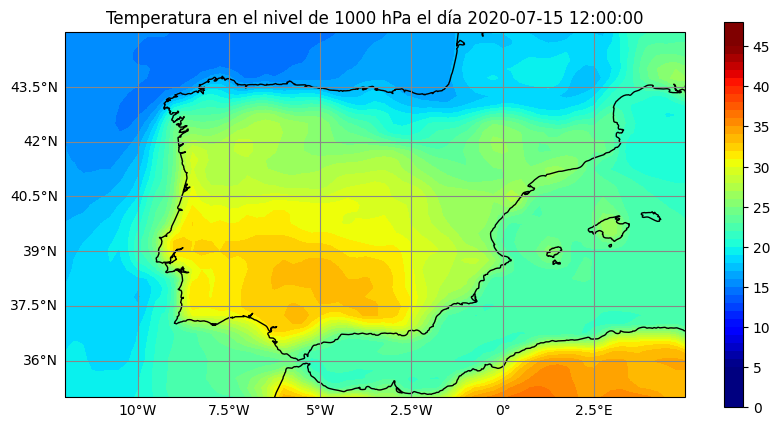

In [24]:
# Extensiones para el dibujo de mapas
# -----------------------------------
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Creamos una figura contenedora
# -------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica equirectangular
# -----------------------------------------------------------
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

# Área geográfica
# -----------------
ax.set_extent((-12,5,35,45))

# Paralelos y meridianos
# -----------------------
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False

# Línea de costa
# ----------------
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)

# Mapa de temperaturas
# -----------------------
pc = ax.contourf(longitud, latitud, temperatura,
            levels = 50,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=5,
            vmax=45
                 )
# Escala de color
# --------------------
cbar = fig.colorbar(pc)


# Título para el gráfico
# ---------------------------------------------------------------
ax.set_title('Temperatura en el nivel de %d hPa el día %s' % (ds.variables['level'][ilevel],fechas[itime]))


plt.show()

##Ejemplo: proceso de datos en bucle

* Si tuviéramos limitaciones de memoria aún podríamos crear un gráfico con múltiples mapas procesando los datos en bucle

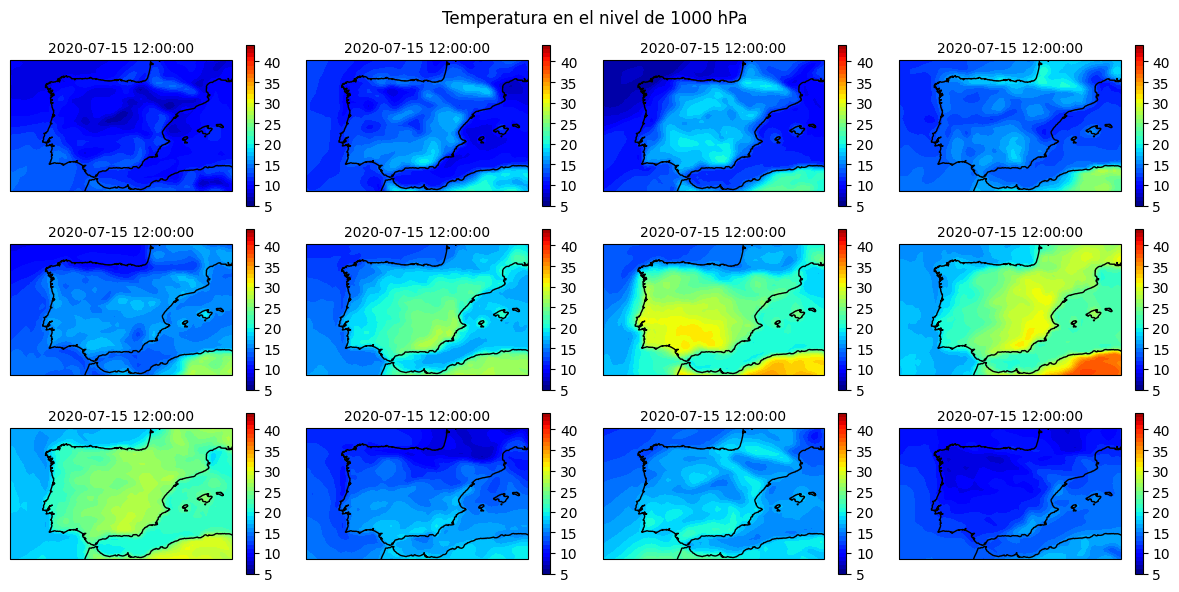

In [25]:
# Creamos una figura contenedora
# ---------------------------------
fig = plt.figure(figsize=[12, 6])

# Añadimos un mapa con proyección ortográfica equirectangular
# -----------------------------------------------------------
ax = fig.subplots(3, 4,
                  subplot_kw={'projection' : ccrs.PlateCarree()})

k = 0

for zax in ax.flatten() :


    temperatura = ds.variables['t'][k, ilevel, :, :] - 275.15

    k += 1

    # Área geográfica
    # -----------------
    zax.set_extent((-12,5,35,45))

    # Línea de costa
    # ----------------
    zax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)

    # Mapa de temperaturas
    # -----------------------
    pc = zax.contourf(longitud, latitud, temperatura,
                levels = np.arange(5,45,1),
                transform=ccrs.PlateCarree(),
                cmap='jet',
                vmin=5,
                vmax=45
                    )
    # Escala de color
    # --------------------
    cbar = fig.colorbar(pc, ticks=np.arange(5,45,5))


    # Título para el gráfico
    # ---------------------------------------------------------------
    zax.set_title(fechas[itime],size=10)

plt.suptitle('Temperatura en el nivel de %d hPa' % ds.variables['level'][ilevel])
plt.tight_layout()
plt.show()

##Modificación de ficheros NetCDF

* Es posible realizar modificaciones en un fichero de datos

* Para ello abriremos el fichero en modo `r+` que permite tanto la lectura como la modificación del contenido

* Conviene extremar las precauciones cuando habilitamos la escritura

* En el siguiente ejemplo crearemos una nueva variable llamada `viento` que almacenará la velocidad del viento calculada a partir de las componentes vectoriales

###Ejemplo: añadir una variable

In [26]:
# Abrimos el fichero de datos en modo r+ que permite la
# lectura y la modificación de los datos
# ----------------------------------------------------------
ds = nc.Dataset('/content/era5_2000.nc',   mode='r+')

# Leemos las componentes del viento
# ------------------------------------------------
u = ds.variables['u'][:,:,:,:]
v = ds.variables['v'][:,:,:,:]

# Creamos un array con la velocidad del viento
# ---------------------------------------------
mag = np.sqrt(u**2 + v**2)

# Creamos una variable viento en el dataset
# Las dimensiones son las mismas que las de las componentes
# El tipo de datos es real de 4 bytes (f4)
# ----------------------------------------------
viento = ds.createVariable('viento', 'f4', ('time', 'level', 'latitude', 'longitude'))

# Asignamos los datos a la nueva variable
# ----------------------------------------
viento[:,:,:,:] = mag[:,:,:,:]

# Creamos algunos atributos para la nueva variable.
# Flagrante violación del CF-1.6 😧😧😧
# Ficheros para uso personal 😁😁😁
# ------------------------------------------------
viento.units          = 'm/s'
viento.standard_name  = 'velocidad del viento'
viento.missing_value  = -32767

# Cerramos el fichero para completar el proceso
# ----------------------------------------------
ds.close()

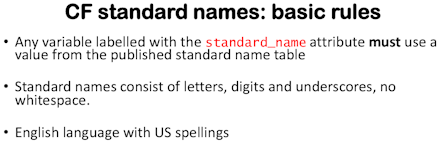

* Reabrimos el fichero en modo lectura para comprobar los cambios

In [27]:
# Abrimos el fichero de datos en modo lectura
# ---------------------------------------------------
ds = nc.Dataset('/content/era5_2000.nc',   mode='r')

# Variables
# ---------
print(ds.variables.keys())

print()

# Metadato de la nueva variable
# ------------------------------
print(ds.variables['viento'])

dict_keys(['longitude', 'latitude', 'level', 'time', 't', 'u', 'v', 'viento'])

<class 'netCDF4._netCDF4.Variable'>
float32 viento(time, level, latitude, longitude)
    units: m/s
    standard_name: velocidad del viento
    missing_value: -32767.0
unlimited dimensions: 
current shape = (12, 4, 401, 481)
filling on, default _FillValue of 9.969209968386869e+36 used


###Ejemplo: representación del contenido añadido

* Representamos la variables gráficamente

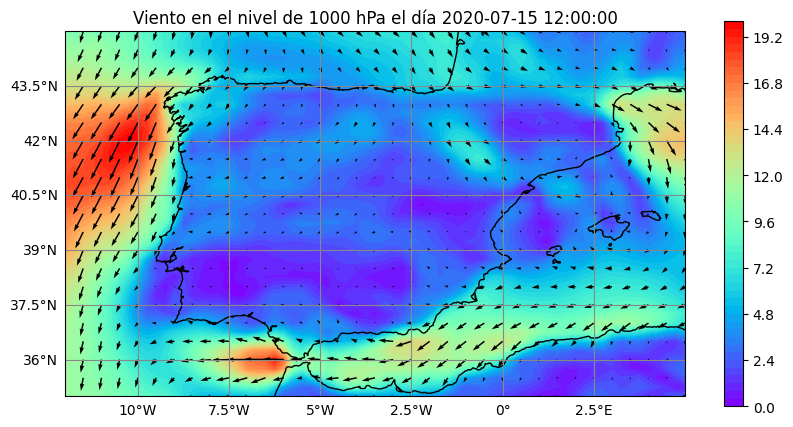

In [28]:
# Leemos datos y dimensiones
# -----------------------------
itime  = 6
ilevel = 3
longitud = ds.variables['longitude'][:]
latitud  = ds.variables['latitude'][:]
viento   = ds.variables['viento'][itime, ilevel, :, :]
u        = ds.variables['u'][itime, ilevel, :, :]
v        = ds.variables['v'][itime, ilevel, :, :]

# Extensiones para el dibujo de mapas
# -----------------------------------
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Creamos una figura contenedora
# -------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica equirectangular
# -----------------------------------------------------------
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

# Área geográfica
# -----------------
ax.set_extent((-12,5,35,45))

# Paralelos y meridianos
# -----------------------
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False

# Línea de costa
# ----------------
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)

# Mapa de temperaturas
# -----------------------
pc = ax.contourf(longitud, latitud, viento,
            levels = 50,
            transform=ccrs.PlateCarree(),
            cmap='rainbow',
                 )
# Escala de color
# --------------------
cbar = fig.colorbar(pc)

skip = 2
ax.quiver(longitud[::skip], latitud[::skip], u[::skip,::skip], v[::skip,::skip],scale=500)


# Título para el gráfico
# ---------------------------------------------------------------
ax.set_title('Viento en el nivel de %d hPa el día %s' % (ds.variables['level'][ilevel],fechas[itime]))


plt.show()

##Más herramientas

* [Acceso a datos NetCDF de Copernicus/ECMWF](https://colab.research.google.com/github/waveology/kitchen/blob/main/00_acceso_a_datos_netcdf_copernicus_ecmwf.ipynb)

* [Introducción al trabajo con NetCDF](https://colab.research.google.com/github/waveology/kitchen/blob/main/01_introduccion_al_trabajo_con_netcdf.ipynb)

* [Introducción a cdo](https://colab.research.google.com/github/waveology/kitchen/blob/main/02_introduccion_cdo.ipynb)

* [Introducción a xarray](https://colab.research.google.com/github/waveology/kitchen/blob/main/03_introducci%C3%B3n_xarray.ipynb)

* [Introducción a Cartopy](https://colab.research.google.com/github/waveology/kitchen/blob/main/04_introduccion_cartopy.ipynb)

* [Introducción a nco](https://colab.research.google.com/github/waveology/kitchen/blob/main/06_introducci%C3%B3n_nco.ipynb)
